In [0]:
from keras_preprocessing import text
import nltk
import numpy as np
import string
from nltk.corpus import stopwords
import string
from string import punctuation
import re

In [0]:
nltk.download('punkt')
nltk.download('gutenberg')
from nltk.corpus import gutenberg
nltk.download('stopwords')
austen = gutenberg.sents('austen-sense.txt') + gutenberg.sents('austen-emma.txt') + gutenberg.sents('austen-persuasion.txt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
print(len(austen))
print(austen[2])
print(austen[0][3])

16498
['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.']
Sensibility


In [0]:
remove_terms = punctuation + '0123456789'

In [0]:
def normalize_document(doc):
    stop_words = nltk.corpus.stopwords.words('english')
    wpt = nltk.WordPunctTokenizer()


    # lower case and remove special characters\whitespaces

    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)

    doc = doc.lower()

    doc = doc.strip()

    # tokenize document

    tokens = wpt.tokenize(doc)

    # filter stopwords out of document

    filtered_tokens = [token for token in tokens if token not in stop_words]

    # re-create document from filtered tokens

    doc = ' '.join(filtered_tokens)

    return doc
 



In [0]:
normalize_corpus = np.vectorize(normalize_document)
normalized_corpus = [[word.lower() for word in sent if word not in remove_terms] for sent in austen]

normalized_corpus = [' '.join(tok_sent) for tok_sent in normalized_corpus]

normalized_corpus = filter(None, normalize_corpus(normalized_corpus))

normalized_corpus = [tok_sent for tok_sent in normalized_corpus if len(tok_sent.split()) > 2]

In [0]:
print('Length of processed corpus:', len(normalized_corpus))
print('Processed line:', normalized_corpus[10])

Length of processed corpus: 13927
Processed line: therefore succession norland estate really important sisters fortune independent might arise father inheriting property could small


In [0]:
tokenizer = text.Tokenizer()

tokenizer.fit_on_texts(normalized_corpus)

word2idx = tokenizer.word_index



# build vocabulary of unique words

word2idx['PAD'] = 0

idx2word = {v:k for k, v in word2idx.items()}

word_ids = [[word2idx[w] for w in text.text_to_word_sequence(doc)] for doc in normalized_corpus]

sents_as_ids = [[word2idx[w] for w in text.text_to_word_sequence(doc)] for doc in normalized_corpus]


vocab_size = len(word2idx) -1 #(padding)

embed_size = 100

window_size = 2 # context window size





In [0]:
print(word2idx)
print(idx2word)
print(normalized_corpus[1])
print(sents_as_ids[1])

{'could': 1, 'would': 2, 'mr': 3, 'mrs': 4, 'must': 5, 'said': 6, 'one': 7, 'much': 8, 'miss': 9, 'every': 10, 'emma': 11, 'well': 12, 'think': 13, 'might': 14, 'good': 15, 'little': 16, 'never': 17, 'elinor': 18, 'time': 19, 'know': 20, 'thing': 21, 'nothing': 22, 'marianne': 23, 'say': 24, 'great': 25, 'soon': 26, 'though': 27, 'see': 28, 'without': 29, 'anne': 30, 'harriet': 31, 'first': 32, 'man': 33, 'may': 34, 'quite': 35, 'always': 36, 'two': 37, 'ever': 38, 'weston': 39, 'lady': 40, 'made': 41, 'thought': 42, 'day': 43, 'sister': 44, 'dear': 45, 'sure': 46, 'knightley': 47, 'young': 48, 'shall': 49, 'make': 50, 'elton': 51, 'mother': 52, 'however': 53, 'give': 54, 'father': 55, 'house': 56, 'long': 57, 'like': 58, 'come': 59, 'better': 60, 'sir': 61, 'even': 62, 'upon': 63, 'away': 64, 'seemed': 65, 'many': 66, 'indeed': 67, 'room': 68, 'friend': 69, 'woodhouse': 70, 'go': 71, 'captain': 72, 'last': 73, 'way': 74, 'jane': 75, 'enough': 76, 'felt': 77, 'mind': 78, 'still': 79, '

In [0]:
print('Number of unique words:', vocab_size)
print('\nSample  word2idx: ',list(word2idx.items())[:10])
print('\nSample  idx2word: ',list(idx2word.items())[:10])
print('\nSample normalized corpus:', normalized_corpus[:3])
print('\nAbove sentence as a list of ids:' , sents_as_ids[:3])

Number of unique words: 10098

Sample  word2idx:  [('could', 1), ('would', 2), ('mr', 3), ('mrs', 4), ('must', 5), ('said', 6), ('one', 7), ('much', 8), ('miss', 9), ('every', 10)]

Sample  idx2word:  [(1, 'could'), (2, 'would'), (3, 'mr'), (4, 'mrs'), (5, 'must'), (6, 'said'), (7, 'one'), (8, 'much'), (9, 'miss'), (10, 'every')]

Sample normalized corpus: ['sense sensibility jane austen', 'family dashwood long settled sussex', 'estate large residence norland park centre property many generations lived respectable manner engage general good opinion surrounding acquaintance']

Above sentence as a list of ids: [[305, 1379, 75, 4299], [108, 101, 57, 333, 2588], [1022, 405, 1627, 597, 554, 2784, 1023, 66, 4300, 512, 768, 160, 1164, 199, 15, 190, 3044, 147]]


In [0]:
from keras_preprocessing.sequence import skipgrams
skip_grams = [skipgrams(sent,vocabulary_size=vocab_size, window_size = 5) for sent in sents_as_ids]

In [0]:
pairs, labels=skip_grams[0][0], skip_grams[0][1]

for i in range(len(pairs)):
    print('({:s} ({:d})),{:s},({:d})) -> {:d}'.format(
    idx2word[pairs[i][0]], pairs[i][0],
    idx2word[pairs[i][1]], pairs[i][1],
    labels[i]))

(sensibility (1379)),jane,(75)) -> 1
(sensibility (1379)),confess,(840)) -> 0
(austen (4299)),expressed,(956)) -> 0
(austen (4299)),culture,(6052)) -> 0
(austen (4299)),extenuation,(5052)) -> 0
(austen (4299)),sensibility,(1379)) -> 1
(jane (75)),austen,(4299)) -> 1
(jane (75)),labouring,(5899)) -> 0
(austen (4299)),sense,(305)) -> 1
(sensibility (1379)),austen,(4299)) -> 1
(sensibility (1379)),shows,(9041)) -> 0
(jane (75)),tupmans,(8551)) -> 0
(sensibility (1379)),filling,(4857)) -> 0
(austen (4299)),jane,(75)) -> 1
(sense (305)),hussy,(7556)) -> 0
(sense (305)),sensibility,(1379)) -> 1
(jane (75)),sense,(305)) -> 1
(jane (75)),sensibility,(1379)) -> 1
(sense (305)),nicer,(7648)) -> 0
(jane (75)),dared,(1155)) -> 0
(sense (305)),enabled,(2790)) -> 0
(sense (305)),jane,(75)) -> 1
(sense (305)),austen,(4299)) -> 1
(sensibility (1379)),sense,(305)) -> 1


In [0]:
from keras.layers import Dot, Input
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:
# The first step is to initialize and transform the first input using the following lines of code:

target_word = Input((1,), dtype='int32')

target_embedding = Embedding(vocab_size, embed_size, name='target_embed_layer',
                             embeddings_initializer='glorot_uniform',
                             input_length=1)(target_word)

target_input = Reshape((embed_size, ))(target_embedding)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Similar code for the ‘context_word’ input

context_word = Input((1,), dtype='int32')

context_embedding = Embedding(vocab_size, embed_size, name='context_embed_layer',
                             embeddings_initializer='glorot_uniform',
                             input_length=1)(context_word)

context_input = Reshape((embed_size, ))(context_embedding)

In [0]:
from keras.layers import Dense, merge, concatenate
from keras.models import Sequential
#label= Dense(3,activation='sigmoid',kernel_initializer='glorot_uniform')

In [0]:
#Not in Keras 2
from keras.layers import Dot
#model = Sequential()
merged_inputs = Dot(axes=-1, normalize=False)([target_input, context_input])
#model.add(merge([target_input, context_input], mode="dot"))

#model.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))

#model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [0]:
label = Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid")(merged_inputs)

In [0]:
model = Model(inputs=[target_word, context_word], outputs=[label])
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
target_embed_layer (Embedding)  (None, 1, 100)       1009800     input_1[0][0]                    
__________________________________________________________________________________________________
context_embed_layer (Embedding) (None, 1, 100)       1009800     input_2[0][0]                    
__________________________________________________________________________________________________
reshape_1 

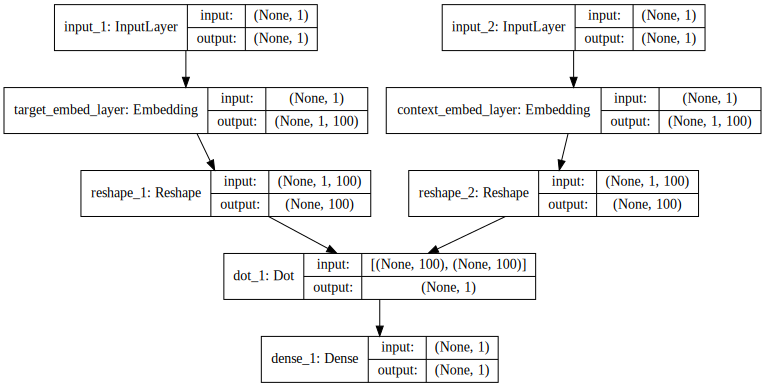

In [0]:
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [0]:
for epoch in range(1, 6):
    epoch_loss = 0
# in each epoch, train all the sentences, one per iteration=> batch_size = num_sents
    for i, sent_examples in enumerate(skip_grams):
        target_wds = np.array([pair[0] for pair in sent_examples[0]], dtype='int32')
        context_wds = np.array([pair[1] for pair in sent_examples[0]], dtype='int32')
        labels = np.array(sent_examples[1], dtype='int32')
        X = [target_wds, context_wds]
        Y = labels
        if i % 5000 == 0: # after 5000 sentences i.e. 5000 iterations
            print('Processed %d sentences' %i)
        epoch_loss += model.train_on_batch(X, Y)
print('Processed all %d sentences' %i)
print('Epoch:', epoch, 'Loss:', epoch_loss, '\n')

Processed 0 sentences
Instructions for updating:
Use tf.cast instead.
Processed 5000 sentences
Processed 10000 sentences
Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 13926 sentences
Epoch: 5 Loss: 1820.882341723889 



In [0]:
word_embeddings = model.get_layer('target_embed_layer').get_weights()[0][0:]
print(word_embeddings.shape)

(10098, 100)


In [0]:
from pandas import DataFrame
print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(word_embeddings)
print(similarity_matrix.shape)

(10099, 10099)


In [0]:
search_terms = ['man', 'love', 'hatred', 'woman', 'wisdom', 'kindness', 'god', 'man', 'folly', 'fool']
similar_words = {term: [idx2word[idx]
    for idx in (-1 * similarity_matrix[word2idx[term]-1]).argsort()[1:6] + 1]
                 for term in search_terms}
print(similar_words)

{'man': ['impolite', 'quieter', 'appendages', 'disturbance', 'luckiest'], 'love': ['smokes', 'olive', 'acute', 'biddy', 'mentioned'], 'hatred': ['unavoidable', 'meat', 'affirmative', 'borrow', 'pleasures'], 'woman': ['hymen', 'bruises', 'believed', 'excursion', 'daughter'], 'wisdom': ['surrender', 'doubted', 'fagged', 'discredit', 'connect'], 'kindness': ['relinquishing', 'hearty', 'coaches', 'kitty', 'young'], 'god': ['convivial', 'dressing', 'th', 'comfort', 'styled'], 'folly': ['industry', 'submit', 'generally', 'unsuitable', 'lustily'], 'fool': ['dismounted', 'woollen', 'talents', 'said', 'gentleman']}


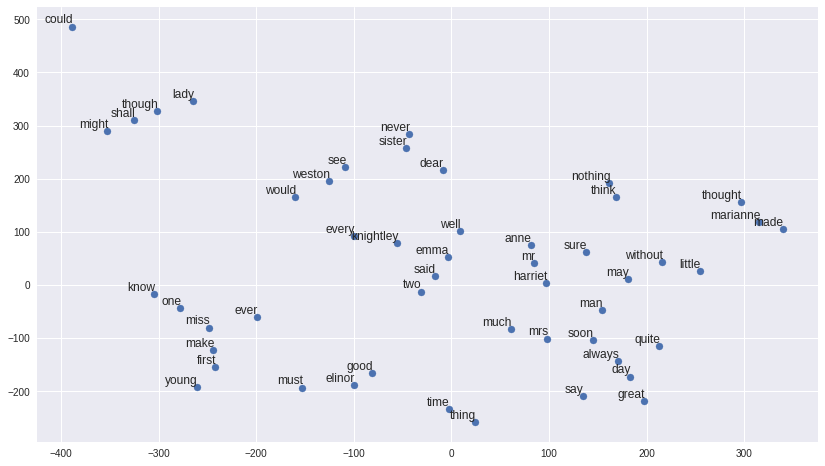

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50
T = tsne.fit_transform(word_embeddings[:plot_only, :])
labels = [idx2word[i+1] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
   plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right',
        va='bottom')